<a href="https://colab.research.google.com/github/Infant-Joshva/Data-Science-learning-path/blob/main/DS-Practice-Notebooks/DS03-eda-casestudy-ml/ML/ML_Hands_on.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Regression

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error,root_mean_squared_error

In [2]:
House_data={
    'Area_SQFT':[100,200,300,400,400,300,500,600,800,1000,1200,1500,1700,1800,2000,2200,2100,2500,2400,2600,2700,2800,2900,3000],
    "Price_Lacks":[ 500,1000,1500,2000,2500,3000,3500,4000,4500,5000,5500,6000,6500,7000,7500,8000,8500,9000,9500,10000,10500,11000,11500,12000]
}

df=pd.DataFrame(House_data)
df

,Area_SQFT,Price_Lacks
0,100,500
1,200,1000
2,300,1500
3,400,2000
4,400,2500
5,300,3000
6,500,3500
7,600,4000
8,800,4500
9,1000,5000


<Axes: xlabel='Area_SQFT', ylabel='Price_Lacks'>

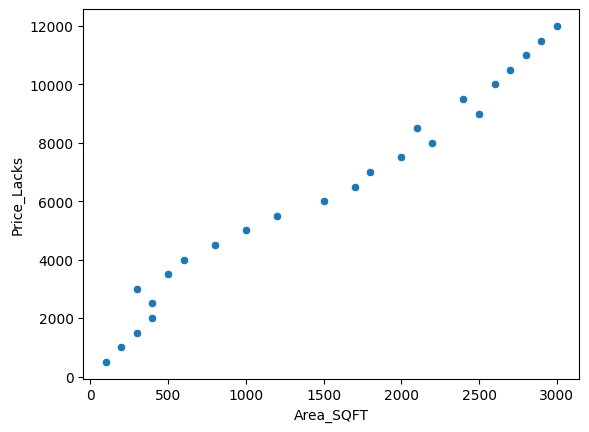

In [3]:
sns.scatterplot(data=df,x="Area_SQFT",y="Price_Lacks")

<Axes: xlabel='Area_SQFT', ylabel='Price_Lacks'>

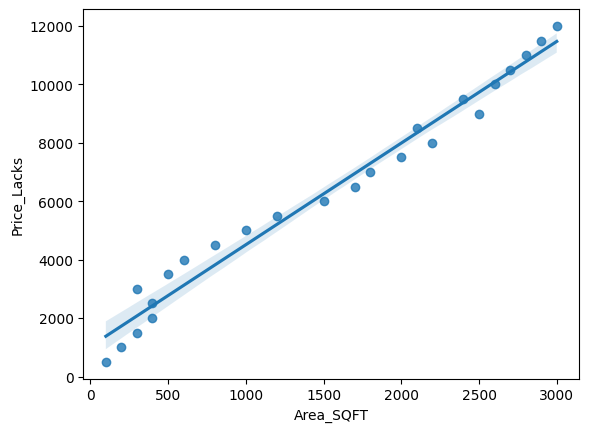

In [4]:
sns.regplot(data=df,x="Area_SQFT",y="Price_Lacks")

In [5]:
x=df[["Area_SQFT"]]
y=df["Price_Lacks"]

In [6]:
x

,Area_SQFT
0,100
1,200
2,300
3,400
4,400
5,300
6,500
7,600
8,800
9,1000


In [7]:
y

,Price_Lacks
0,500
1,1000
2,1500
3,2000
4,2500
5,3000
6,3500
7,4000
8,4500
9,5000


In [9]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((19, 1), (5, 1), (19,), (5,))

In [10]:
Lr=LinearRegression()
Lr

LinearRegression()

In [11]:
Lr.fit(X_train,y_train) # model Train

LinearRegression()

In [12]:
X_test #Actual data which was provided for traning

,Area_SQFT
8,800
16,2100
0,100
18,2400
11,1500


In [13]:
y_test #Actual data which was provided for traning

,Price_Lacks
8,4500
16,8500
0,500
18,9500
11,6000


In [14]:
Lr.predict(X_test) #Prediction

array([3858.9878259 , 8318.19650937, 1457.87545788, 9347.2446671 ,
       6260.10019392])

In [15]:
y_pred_train=Lr.predict(X_train)
y_pred_test=Lr.predict(X_test)

In [16]:
y_train

,Price_Lacks
9,5000
13,7000
1,1000
21,11000
5,3000
2,1500
12,6500
15,8000
3,2000
4,2500


In [17]:
y_pred_train

array([ 4545.01993105,  7289.14835165,  1800.89151045, 10719.3088774 ,
        2143.90756303,  2143.90756303,  6946.13229907,  8661.21256195,
        2486.9236156 ,  2486.9236156 , 11062.32492997,  9690.26071967,
       10376.29282482, 11405.34098255,  3172.95572075,  5231.0520362 ,
        7975.1804568 , 10033.27677225,  2829.93966817])

<Axes: xlabel='Area_SQFT', ylabel='Price_Lacks'>

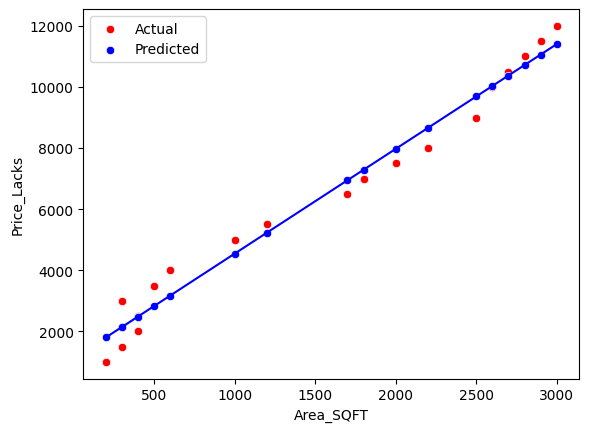

In [18]:
#Train data vs Train Pred plot

sns.scatterplot(x=X_train['Area_SQFT'],y=y_train,color="red",label='Actual')
sns.scatterplot(x=X_train['Area_SQFT'],y=y_pred_train,color="blue",label='Predicted')
sns.lineplot(x=X_train['Area_SQFT'],y=y_pred_train,color="blue")

<Axes: xlabel='Area_SQFT', ylabel='Price_Lacks'>

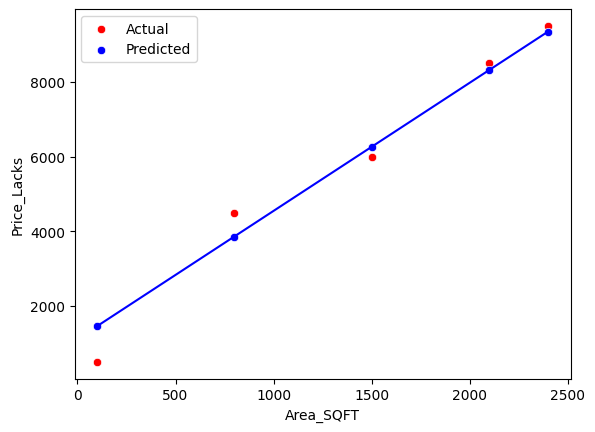

In [19]:
#Test data vs Test data Pred plot

sns.scatterplot(x=X_test['Area_SQFT'],y=y_test,color="red",label='Actual')
sns.scatterplot(x=X_test['Area_SQFT'],y=y_pred_test,color="blue",label='Predicted')
sns.lineplot(x=X_test['Area_SQFT'],y=y_pred_test,color="blue")

In [20]:
#Evaluation: Finding R2 value.

r2_train=r2_score(y_train,y_pred_train)
r2_test=r2_score(y_test,y_pred_test)
print("r2_train",r2_train)
print("r2_test",r2_test)

r2_train 0.9766333417320221
r2_test 0.9714082517331004


In [21]:
#Finding Mean_abs_error value

mean_absolute_error(y_train,y_pred_train)

476.5193526803434

In [22]:
#Finding Mean_sqr_error value

mean_squared_error(y_train,y_pred_train)

289526.4887331451

In [23]:
#Finding root_sqr_error value

root_mean_squared_error(y_train,y_pred_train)

538.0766569301675

In [24]:
#Predict a new value

Lr.predict([[500]])

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([2829.93966817])

#Polynomial Regression

In [26]:
#Importing packages for polynomial reg

from sklearn.preprocessing import PolynomialFeatures

In [27]:
X_train

,Area_SQFT
9,1000
13,1800
1,200
21,2800
5,300
2,300
12,1700
15,2200
3,400
4,400


In [28]:
X_train

,Area_SQFT
9,1000
13,1800
1,200
21,2800
5,300
2,300
12,1700
15,2200
3,400
4,400


r2_train 0.976633341732022
r2_test 0.9714082517331004
mae_train 476.5193526803434
mae_test 438.7093298857997


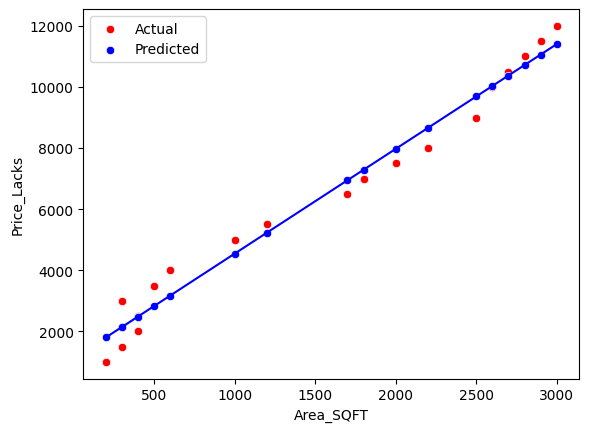

In [29]:
poly=PolynomialFeatures(degree=1)
X_train_poly=poly.fit_transform(X_train)
X_test_poly=poly.transform(X_test)

# Polynomial Regression
poly_reg=LinearRegression()
poly_reg.fit(X_train_poly,y_train)

# Prediction
y_train_poly_pred=poly_reg.predict(X_train_poly)
y_test_poly_pred=poly_reg.predict(X_test_poly)

# Visuvalaize

sns.scatterplot(x=X_train['Area_SQFT'],y=y_train,color="red",label='Actual')
sns.scatterplot(x=X_train['Area_SQFT'],y=y_train_poly_pred,color="blue",label='Predicted')
sns.lineplot(x=X_train['Area_SQFT'],y=y_train_poly_pred,color="blue")

# Evaluation

r2_train=r2_score(y_train,y_train_poly_pred)
r2_test=r2_score(y_test,y_test_poly_pred)
print("r2_train",r2_train)
print("r2_test",r2_test)

mae_train=mean_absolute_error(y_train,y_train_poly_pred)
mae_test=mean_absolute_error(y_test,y_test_poly_pred)
print("mae_train",mae_train)
print("mae_test",mae_test)

r2_train 0.9778213739961734
r2_test 0.9600552842272664
mae_train 444.7412975815336
mae_test 497.30872986459144


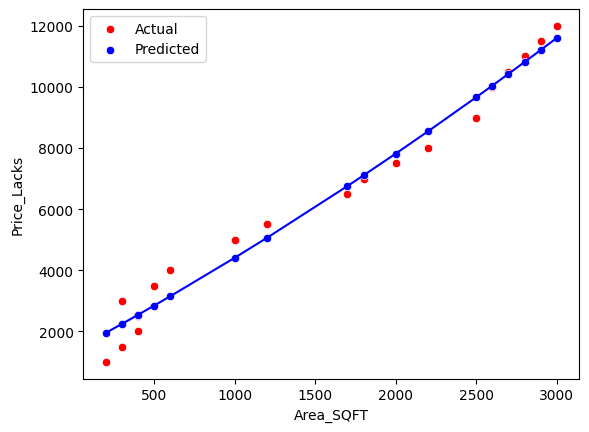

In [30]:
poly=PolynomialFeatures(degree=2)
X_train_poly=poly.fit_transform(X_train)
X_test_poly=poly.transform(X_test)

# Polynomial Regression
poly_reg=LinearRegression()
poly_reg.fit(X_train_poly,y_train)

# Prediction
y_train_poly_pred=poly_reg.predict(X_train_poly)
y_test_poly_pred=poly_reg.predict(X_test_poly)

# Visuvalaize

sns.scatterplot(x=X_train['Area_SQFT'],y=y_train,color="red",label='Actual')
sns.scatterplot(x=X_train['Area_SQFT'],y=y_train_poly_pred,color="blue",label='Predicted')
sns.lineplot(x=X_train['Area_SQFT'],y=y_train_poly_pred,color="blue")

# Evaluation

r2_train=r2_score(y_train,y_train_poly_pred)
r2_test=r2_score(y_test,y_test_poly_pred)
print("r2_train",r2_train)
print("r2_test",r2_test)

mae_train=mean_absolute_error(y_train,y_train_poly_pred)
mae_test=mean_absolute_error(y_test,y_test_poly_pred)
print("mae_train",mae_train)
print("mae_test",mae_test)

r2_train 0.9898712443168196
r2_test 0.9767114622948225
mae_train 265.7923768686789
mae_test 388.2854611042658


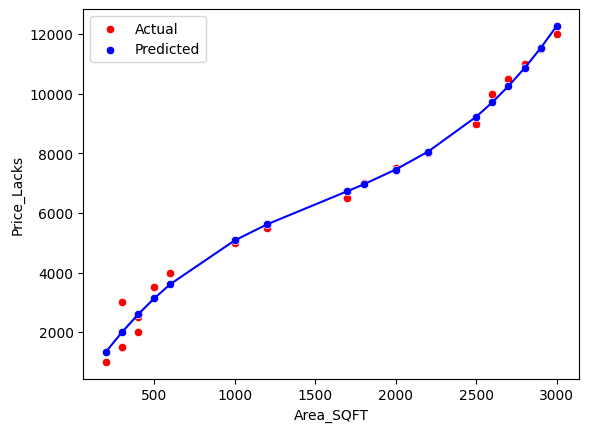

In [31]:
poly=PolynomialFeatures(degree=3)
X_train_poly=poly.fit_transform(X_train)
X_test_poly=poly.transform(X_test)

# Polynomial Regression
poly_reg=LinearRegression()
poly_reg.fit(X_train_poly,y_train)

# Prediction
y_train_poly_pred=poly_reg.predict(X_train_poly)
y_test_poly_pred=poly_reg.predict(X_test_poly)

# Visuvalaize

sns.scatterplot(x=X_train['Area_SQFT'],y=y_train,color="red",label='Actual')
sns.scatterplot(x=X_train['Area_SQFT'],y=y_train_poly_pred,color="blue",label='Predicted')
sns.lineplot(x=X_train['Area_SQFT'],y=y_train_poly_pred,color="blue")

# Evaluation

r2_train=r2_score(y_train,y_train_poly_pred)
r2_test=r2_score(y_test,y_test_poly_pred)
print("r2_train",r2_train)
print("r2_test",r2_test)

mae_train=mean_absolute_error(y_train,y_train_poly_pred)
mae_test=mean_absolute_error(y_test,y_test_poly_pred)
print("mae_train",mae_train)
print("mae_test",mae_test)

r2_train 0.9346923490063995
r2_test 0.8115491227470024
mae_train 664.529701356104
mae_test 1170.2300775980643


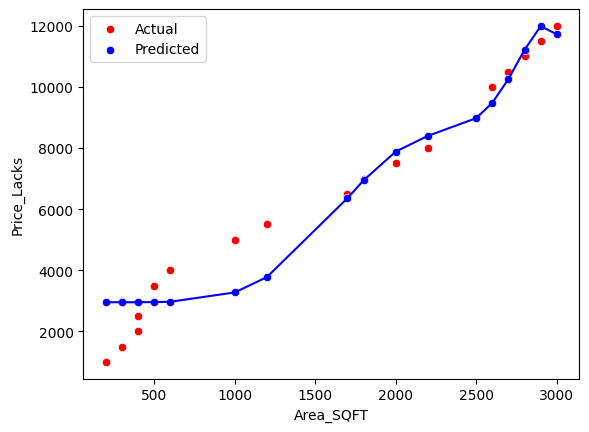

In [32]:
poly=PolynomialFeatures(degree=10)
X_train_poly=poly.fit_transform(X_train)
X_test_poly=poly.transform(X_test)

# Polynomial Regression
poly_reg=LinearRegression()
poly_reg.fit(X_train_poly,y_train)

# Prediction
y_train_poly_pred=poly_reg.predict(X_train_poly)
y_test_poly_pred=poly_reg.predict(X_test_poly)

# Visuvalaize

sns.scatterplot(x=X_train['Area_SQFT'],y=y_train,color="red",label='Actual')
sns.scatterplot(x=X_train['Area_SQFT'],y=y_train_poly_pred,color="blue",label='Predicted')
sns.lineplot(x=X_train['Area_SQFT'],y=y_train_poly_pred,color="blue")

# Evaluation

r2_train=r2_score(y_train,y_train_poly_pred)
r2_test=r2_score(y_test,y_test_poly_pred)
print("r2_train",r2_train)
print("r2_test",r2_test)

mae_train=mean_absolute_error(y_train,y_train_poly_pred)
mae_test=mean_absolute_error(y_test,y_test_poly_pred)
print("mae_train",mae_train)
print("mae_test",mae_test)

In [33]:
X_train_poly

array([[1.00000000e+00, 1.00000000e+03, 1.00000000e+06, 1.00000000e+09,
        1.00000000e+12, 1.00000000e+15, 1.00000000e+18, 1.00000000e+21,
        1.00000000e+24, 1.00000000e+27, 1.00000000e+30],
       [1.00000000e+00, 1.80000000e+03, 3.24000000e+06, 5.83200000e+09,
        1.04976000e+13, 1.88956800e+16, 3.40122240e+19, 6.12220032e+22,
        1.10199606e+26, 1.98359290e+29, 3.57046723e+32],
       [1.00000000e+00, 2.00000000e+02, 4.00000000e+04, 8.00000000e+06,
        1.60000000e+09, 3.20000000e+11, 6.40000000e+13, 1.28000000e+16,
        2.56000000e+18, 5.12000000e+20, 1.02400000e+23],
       [1.00000000e+00, 2.80000000e+03, 7.84000000e+06, 2.19520000e+10,
        6.14656000e+13, 1.72103680e+17, 4.81890304e+20, 1.34929285e+24,
        3.77801998e+27, 1.05784560e+31, 2.96196767e+34],
       [1.00000000e+00, 3.00000000e+02, 9.00000000e+04, 2.70000000e+07,
        8.10000000e+09, 2.43000000e+12, 7.29000000e+14, 2.18700000e+17,
        6.56100000e+19, 1.96830000e+22, 5.90490000e+

#### Finding Polynomial_reg for Multivariable

In [34]:
House_data={
    'Num_Rooms':[2,2,3,3,2,3,3,3,4,4,4,4,5,4,4,5,5,5,6,6,6,6,6,6],
    'Area_SQFT':[100,200,300,400,400,300,500,600,800,1000,1200,1500,1700,1800,2000,2200,2100,2500,2400,2600,2700,2800,2900,3000],
    "Price":[ 500,1000,1500,2000,2500,3000,3500,4000,4500,5000,5500,6000,6500,7000,7500,8000,8500,9000,9500,10000,10500,11000,11500,12000]
}

df=pd.DataFrame(House_data)
df

,Num_Rooms,Area_SQFT,Price
0,2,100,500
1,2,200,1000
2,3,300,1500
3,3,400,2000
4,2,400,2500
5,3,300,3000
6,3,500,3500
7,3,600,4000
8,4,800,4500
9,4,1000,5000


In [35]:
df.describe()

,Num_Rooms,Area_SQFT,Price
count,24.000000,24.000000,24.000000
mean,4.208333,1500.000000,6250.000000
std,1.382473,1003.905417,3535.533906
min,2.000000,100.000000,500.000000
25%,3.000000,475.000000,3375.000000
50%,4.000000,1600.000000,6250.000000
75%,5.250000,2425.000000,9125.000000
max,6.000000,3000.000000,12000.000000


In [36]:
X=df[["Num_Rooms","Area_SQFT"]]
y=df["Price"]

In [37]:
x

,Area_SQFT
0,100
1,200
2,300
3,400
4,400
5,300
6,500
7,600
8,800
9,1000


In [38]:
y

,Price
0,500
1,1000
2,1500
3,2000
4,2500
5,3000
6,3500
7,4000
8,4500
9,5000


In [39]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((19, 2), (5, 2), (19,), (5,))

In [43]:
#Traning the data

Lr=LinearRegression()
Lr.fit(X_train,y_train)

LinearRegression()

In [44]:
#Predection

y_pred_train=Lr.predict(X_train)
y_pred_test=Lr.predict(X_test)

In [45]:
y_train

,Price
9,5000
13,7000
1,1000
21,11000
5,3000
2,1500
12,6500
15,8000
3,2000
4,2500


In [46]:
y_pred_train

array([ 4742.1119984 ,  7056.43546256,  1587.01938658, 10790.10894043,
        2296.69439343,  2296.69439343,  7187.52960338,  8633.98176847,
        2585.98482645,  2165.60025262, 11079.39937345,  9501.85306753,
       10500.81850741, 11368.68980647,  3164.56569249,  5320.69286444,
        7635.0163286 , 10211.52807439,  2875.27525947])

In [48]:
#Evaluation

R2_train=r2_score(y_train,y_pred_train)
R2_test=r2_score(y_test,y_pred_test)
mae_train=mean_absolute_error(y_train,y_pred_train)
mae_test=mean_absolute_error(y_test,y_pred_test)
print("R2_train",R2_train)
print("R2_test",R2_test)
print("mae_train",mae_train)
print("mae_test",mae_test)

R2_train 0.9790664436748785
R2_test 0.9837217526086961
mae_train 441.77488618963923
mae_test 322.20357151760453


In [50]:
#Finding percentage of diffrence for actual data and predicted data

6250.000/441.77488618963923

14.147476905957673

In [51]:
ploy_feature=PolynomialFeatures(degree=2)
X_train_poly=ploy_feature.fit_transform(X_train)
X_test_poly=ploy_feature.transform(X_test)


Lr.fit(X_train_poly,y_train) #fitting the model

y_pred_train=Lr.predict(X_train_poly) #prediction training data
y_pred_test=Lr.predict(X_test_poly) #prediction testing data

R2_train=r2_score(y_train,y_pred_train) #r2 score training data
R2_test=r2_score(y_test,y_pred_test) #r2 score testing data
mae_train=mean_absolute_error(y_train,y_pred_train) #mae training data
mae_test=mean_absolute_error(y_test,y_pred_test) #mae testing data
print("R2_train",R2_train)
print("R2_test",R2_test)
print("mae_train",mae_train)
print("mae_test",mae_test)

R2_train 0.9809576237906027
R2_test 0.963207288792281
mae_train 415.50705078689214
mae_test 491.44322927616156


In [52]:
ploy_feature=PolynomialFeatures(degree=3)
X_train_poly=ploy_feature.fit_transform(X_train)
X_test_poly=ploy_feature.transform(X_test)


Lr.fit(X_train_poly,y_train) #fitting the model

y_pred_train=Lr.predict(X_train_poly) #prediction training data
y_pred_test=Lr.predict(X_test_poly) #prediction testing data

R2_train=r2_score(y_train,y_pred_train) #r2 score training data
R2_test=r2_score(y_test,y_pred_test) #r2 score testing data
mae_train=mean_absolute_error(y_train,y_pred_train) #mae training data
mae_test=mean_absolute_error(y_test,y_pred_test) #mae testing data
print("R2_train",R2_train)
print("R2_test",R2_test)
print("mae_train",mae_train)
print("mae_test",mae_test)

R2_train 0.9921861709425456
R2_test 0.9778816218065729
mae_train 184.64171959976457
mae_test 406.1194774687845


In [53]:
ploy_feature=PolynomialFeatures(degree=4)
X_train_poly=ploy_feature.fit_transform(X_train)
X_test_poly=ploy_feature.transform(X_test)


Lr.fit(X_train_poly,y_train) #fitting the model

y_pred_train=Lr.predict(X_train_poly) #prediction training data
y_pred_test=Lr.predict(X_test_poly) #prediction testing data

R2_train=r2_score(y_train,y_pred_train) #r2 score training data
R2_test=r2_score(y_test,y_pred_test) #r2 score testing data
mae_train=mean_absolute_error(y_train,y_pred_train) #mae training data
mae_test=mean_absolute_error(y_test,y_pred_test) #mae testing data
print("R2_train",R2_train)
print("R2_test",R2_test)
print("mae_train",mae_train)
print("mae_test",mae_test)

R2_train 0.9924354641022269
R2_test 0.9759682137832563
mae_train 170.91777734136312
mae_test 450.98975157956266
